In [1]:
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
# TO open the automated Chrome Browser
driver = webdriver.Chrome(executable_path='chromedriver')

# For all of the functions below please maximize the automated browser.

In [3]:
# Login
driver.implicitly_wait(5)
def Login(sample_username,sample_password):
    driver.get('https://www.instagram.com/')
    time.sleep(5)
    a = driver.find_elements_by_tag_name('input')
    a[0].send_keys(sample_username)
    a[1].send_keys(sample_password)
    driver.find_elements_by_tag_name('button')[1].click()
    time.sleep(10)
    driver.find_element_by_class_name('cmbtv').click() #To skip saving Login info
    time.sleep(10)
    driver.find_element_by_class_name('HoLwm').click() #To remove the "Turn On Notifications" pop up.

In [6]:
# Login('Sample_Username','Sample_Password')

# After this I have assumed that we are logged in on Instagram

# Q1

In [7]:
def top_10():
    driver.get('https://www.instagram.com')
    fol = []
    time.sleep(5)
    for i in range(10):
        driver.find_element_by_xpath('//input[contains(@class,"x3qfX")]').send_keys('food')
        a = driver.find_elements_by_xpath('//a[@class="-qQT3"]/div/div[2]')
        a[i].click()
        time.sleep(5)
        name = driver.find_element_by_tag_name('h2').text
        foll = driver.find_elements_by_class_name('g47SY ')[1].text
        fol.append([name,foll])
    return fol
def count(num): #assuming the results only have followers in thousands or millions
    d = num[:-1]
    e = num[-1]
    if e=='k':
        return int(float(d)*1000)
    elif e=='m':
        return int(float(d)*(10**6))

In [8]:
def search(handle):
    driver.find_element_by_xpath('//input[contains(@class,"x3qfX")]').send_keys(handle)
    time.sleep(3)
    driver.find_element_by_class_name('-qQT3').click()

In [9]:
# 1.1
def top_5():
    t_10 = top_10()
    for i in t_10:
        i[1] = count(i[1])
    t_10.sort(key = lambda x:x[1])
    print(t_10[-5:])
    return(t_10[-5:])

In [10]:
# 1.1
t_5 = top_5()

[['thisisdelhi', 164000], ['streetfoodrecipe', 195000], ['foodtalkindia', 303000], ['yourfoodlab', 1500000], ['foodnetwork', 11000000]]


In [11]:
#1.2
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
wait = WebDriverWait(driver,15)
def prev_3():
    a = t_5
    driver.get('https://www.instagram.com/')
    posts = []
    for i in a:
        n=0
        search(i[0])
        time.sleep(5)
        driver.find_element_by_xpath('//div[contains(@class,"v1Nh3 ")]').click()
        while True:
            time.sleep(3)
            j = wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))
            t = j.text
            nxt = driver.find_element_by_link_text('Next')
            svg = driver.find_element_by_xpath('//*[name()="svg"][@aria-label="Close"]')
            if t[-1] =='h' or t[-1]=='m':
                n+=1
                nxt.click()
            elif t[-1] =='d' and int(t[:-1])<=3:
                n+=1
                nxt.click()
            else:
                svg.click()
                break
        print(i[0],'posts :',n)
        posts.append(n)
    return posts

In [12]:
# 1.2.
posts = prev_3()

thisisdelhi posts : 8
streetfoodrecipe posts : 1
foodtalkindia posts : 3
yourfoodlab posts : 2
foodnetwork posts : 36


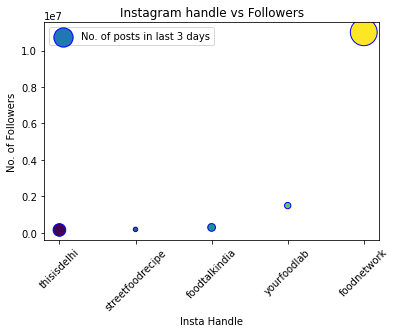

In [13]:
#1.3
handles = [row[0] for row in t_5] #Will be used in next questions also
followers = [row[1] for row in t_5]
post = np.array(posts)*20
c = np.arange(10,15)
plt.scatter(handles,followers,s = post,c=c,edgecolor='b',label='No. of posts in last 3 days')
plt.xticks(rotation=45)
plt.legend()
plt.title('Instagram handle vs Followers')
plt.xlabel('Insta Handle')
plt.ylabel('No. of Followers')
plt.show()

# Q2.

In [14]:
#2.1
def content():
    con = [] 
    for i in handles:
        search(i)
        driver.find_element_by_xpath('//div[contains(@class,"v1Nh3 ")]').click()
        for k in range(10):
            a = driver.find_element_by_xpath('//div[@class="C4VMK"]/span')
            j = BeautifulSoup(a.text)
            con.append(j.string)
            driver.find_element_by_link_text('Next').click()
            time.sleep(3)
        time.sleep(5)
        driver.find_element_by_xpath('//*[name()="svg"][@aria-label="Close"]').click()
    return con

In [15]:
#2.1
con = content()
con

['Koi mujhe bhi viral meme bana do please? 🙏🏽🥺😂\nComment down the jingle if you know it!\n.\nSNAPCHAT:Pragyaaa18👻\nFollow @thisisdelhi\nFollow @thisisdelhi\nFollow @thisisdelhi\n#thisisdelhi #foodforlife #meme #viralw #tasty #yummyintummy #video #foodforlife #foodphotography #washingpowdernirma #streetfood #snacks #yum #spicy #satisfying #satisfyingvideos #mumbaifoodblogger #grub #mumbai #delhifoodblogger #f52grams #delhincr #breakfast #homemade #trending #trend #nirna #india #indian #indianfood',
 'Tujhe dekha toh ye jaana sanam...\nPyaar hota hai bas khana sanam..... ♥️💫\n.\nCAN YOU AGREE MORE?\n.\nAt @ambragk2\nThe pizza’s are above and beyond id you were wondering.\nSNAPCHAT:Pragyaaa18\nFollow @thisisdelhi\nFollow @thisisdelhi\nFollow @thisisdelhi\n#thisisdelhi #foodforlife #meme #funny #tasty #yummyintummy #video #foodforlife #foodphotography #likeforlike #streetfood #snacks #yum #spicy #satisfying #satisfyingvideos #mumbaifoodblogger #grub #mumbai #delhifoodblogger #f52grams #del

In [16]:
def cleanser(arr):
    w = []
    for i in arr:
        word = i.strip(',')
        word = word.strip('.')
        if word !='':
            w.append(word)
    return w

In [17]:
# 2.2
def li_word():
    words=[]
    for i in con:
        words = words + i.split()
    words = cleanser(words)
    words = np.array(words)
    words= np.unique(words,return_counts=True)
    return words

In [18]:
# 2.2
w = li_word() #Now we have a 2d numpy array with words and their frequency of occurence
w

(array(['!', '#Baileys', '#BaileysIndia', ..., '🤷\u200d♀️', '🥞🍯',
        '\U0001f972'], dtype='<U29'),
 array([4, 2, 2, ..., 1, 1, 1], dtype=int64))

In [19]:
# 2.3
data  = {'Word':w[0],'Frequency':w[1]}
df = pd.DataFrame(data)
df.to_csv('Words.csv',index=False)
df

,Word,Frequency
0,!,4
1,#Baileys,2
2,#BaileysIndia,2
3,#Baileyscocktails,2
4,#Baileystreat,2
...,...,...
1474,🤩,1
1475,🤩(Also,1
1476,🤷‍♀️,1
1477,🥞🍯,1


In [20]:
#2.4
df = df[df.Word.str.startswith('#')]
df = df.sort_values(by = 'Frequency',ascending = False)
df.head(10) # Dataframe having top 10 popular hashtags

,Word,Frequency
114,#streetfood,25
48,#foodforlife,18
82,#mumbaifoodblogger,16
35,#delhifoodblogger,11
110,#spicy,11
66,#indianfood,11
77,#mumbai,10
139,#yummyintummy,9
107,#satisfyingvideos,9
106,#satisfying,9


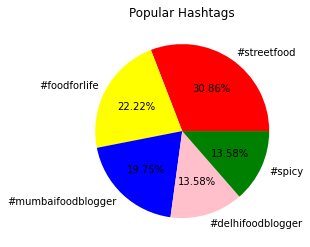

In [21]:
#2.5
hashtags = df.iloc[:5,0].values
freq = df.iloc[:5,1].values
plt.pie(freq,labels=hashtags,colors=['red','yellow','blue','pink','green'],autopct='%.2f%%')
plt.title("Popular Hashtags")
plt.show()

# Q3.

In [22]:
#3.1
from selenium.common.exceptions import NoSuchElementException
def likes():
    like = []
    for h in handles:
        h1 = []
        search(h)
        driver.find_element_by_xpath('//div[contains(@class,"v1Nh3 ")]').click()
        for i in range(10):
            try :
                a = driver.find_element_by_xpath('//a[@class="zV_Nj"]/span').text
                h1.append(a)
            except NoSuchElementException:
                pass
            driver.find_element_by_link_text('Next').click()
            time.sleep(3)
        driver.find_element_by_xpath('//*[name()="svg"][@aria-label="Close"]').click()
        like.append(h1)
    return like

In [23]:
#3.1 For this question we look at the first 10 posts of each handle if the likes are not visible we ignore the post and move 
# to the next one.
from copy import deepcopy
b1 = likes()
a1 = deepcopy(b1)
a1

[['3,337', '1,308', '3,220', '3,970', '3,996', '2,870', '4,397', '5,021'],
 [],
 ['551', '572', '341', '659', '298', '908', '441', '511', '281', '308'],
 ['24,723', '34,106', '36,244', '29,789'],
 ['60,622', '12,757', '7,106']]

In [24]:
def converter(arr):
    n = len(arr)
    likes = 0
    for i in range(n):
        m = arr[i].replace(',','')
        likes += int(m)
    if n==0:    # We took average number of likes = 0 if they were not visible in any of the first 10 posts.
        return 0
    return likes/n
#3.2
def avg():
    for i in range(5):
        a1[i] = converter(a1[i])
    return a1

In [94]:
# 3.2
mean = avg()
mean

[3505.5, 0, 485.6, 31204.25, 26505.333333333332]

In [95]:
#3.3
followers = np.array(followers)
mean_likes = np.array(mean)
ratio = mean_likes/followers
ratio #We have divided the average likes from followers ratio as mentioned in the question.

array([0.021375  , 0.        , 0.00160264, 0.02080283, 0.00240958])

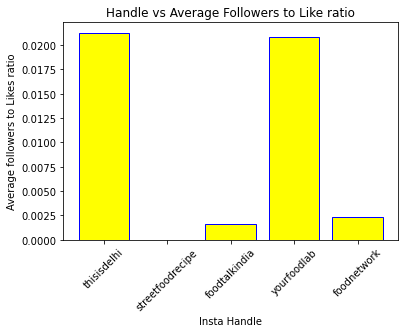

In [51]:
plt.bar(handles,ratio,color='yellow',edgecolor='b')
plt.title('Handle vs Average Followers to Like ratio')
plt.xlabel('Insta Handle')
plt.ylabel('Average followers to Likes ratio')
plt.xticks(rotation=45)
plt.show()

# Thank you , any advice and suggestions will be appreciated :) .